# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('Display.max_rows',None)
pd.set_option('Display.max_columns',None)

df = pd.read_excel('GermanCredit.xlsx')

df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [6]:
df.shape

(1000, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Creditability             1000 non-null   int64
 1   CreditAmount              1000 non-null   int64
 2   DurationOfCreditInMonths  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Creditability,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
CreditAmount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
DurationOfCreditInMonths,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


# 3. Plot Histogram for column 'CreditAmount'

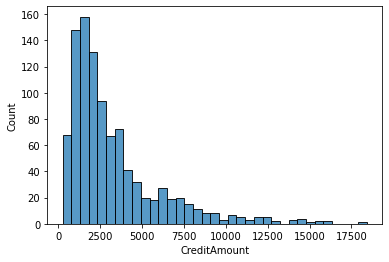

In [10]:
sns.histplot(df['CreditAmount'])
plt.show()

# 3b. Create creditability dataframe

In [14]:
creditability = pd.get_dummies(data=df,columns=['Creditability'],drop_first=True)
creditability

,CreditAmount,DurationOfCreditInMonths,Creditability_1
0,1049,18,1
1,2799,9,1
2,841,12,1
3,2122,12,1
4,2171,12,1
5,2241,10,1
6,3398,8,1
7,1361,6,1
8,1098,18,1
9,3758,24,1


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [15]:
creditability.Creditability_1.value_counts()

1    700
0    300
Name: Creditability_1, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

<AxesSubplot:xlabel='DurationOfCreditInMonths', ylabel='CreditAmount'>

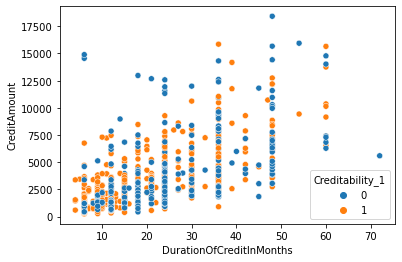

In [18]:
sns.scatterplot(x='DurationOfCreditInMonths',y='CreditAmount',data=creditability,hue='Creditability_1')

# 6. Prepare input data for the model

In [20]:
from sklearn.model_selection import train_test_split

X = creditability.drop('Creditability_1',axis=1)
y = creditability['Creditability_1']

xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=10,test_size=0.20)

print('X train:',xtrain.shape)
print('X test:',xtest.shape)
print('y train:',ytrain.shape)
print('y test:',ytest.shape)

X train: (800, 2)
X test: (200, 2)
y train: (800,)
y test: (200,)


# 7. Fit logistic regression model

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
test_pred = model.predict(xtest)
train_pred = model.predict(xtrain)

# 8. Test accuracy calculation

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,test_pred)

0.675

# 9. Build a confusion matrix

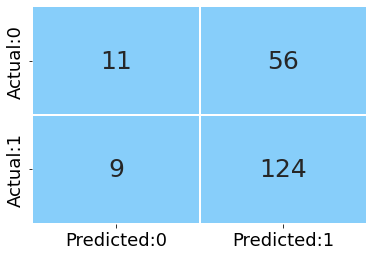

In [42]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

cm = confusion_matrix(ytest,test_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

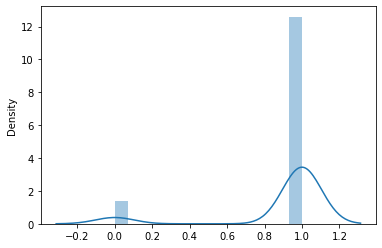

In [47]:
sns.distplot(test_pred)
plt.show()